# Analysis of changes in nightly lows at DCA Reagan National Airport over last 60 years¶

Everyone is aware of global worming caused by the increased CO2 content and CH4 content in our atmosphere, the former being caused by the combustion of fossile fuels and the latter being caused by thawing of tundra and gas flares.  It is also well known that the international community strives to limit global warming by about 1.5 fahrenheit degrees.  Nevertheless, authorities say we may have reached this 1.5 fahrenheit degree increase.  

This project looks at the change in nightly lows in the last 60 years in Washington DC to see how it has changed as compared to the global increase of 1.5 fahrenheit degrees.  Is the change in nightly lows greater?  Why?  Can this be all attributed to global warming?  Or are other factors at play here such as the urban heat island effect?  

Of particular note, after living in Washington DC for some time, I notice that on the local news, the record lows are in the negative double digits in Fahrenheit.  But it has almost never gotten below 10F sinche I have been here, which is 25 years.  Why?  Can I show this on a graph?  Why is this so?  Certainly a global warming of 1.5 Fahrenheit degrees could not solely be the cause of never getting within 20 Fahrenheit degrees of our past record lows.  

This project will explore these issues.  
   
The data was imported from the National Centers for Environmental Information of NOAA (i.e. the National Weather Service)

## After downloading data to my local PC, I now read it in and inspect it. Notice that only the date and the minimum temperatures in Fahrenheit are read in

In [264]:
import pandas as pd
# Program to extract number
# of rows using Python
#import xlrd
 
# Give the location of the file
#loc = ("C:\Users\user\Downloads\rocmintemp1a.csv")
df = pd.read_csv('C:\\Users\\user\\Desktop\\data\\reagan1a.csv')
print(df.head())
print('ldlsl')

       STATION        DATE   MAX   MIN   SNDP
0  72405013743  1960-01-01  44.4  28.4  999.9
1  72405013743  1960-01-02  39.4  28.4  999.9
2  72405013743  1960-01-03  53.4  37.4  999.9
3  72405013743  1960-01-04  44.4  34.3  999.9
4  72405013743  1960-01-05  43.3  35.4  999.9
ldlsl


### I now explore the read in data# 

In [265]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21023 entries, 0 to 21022
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  21023 non-null  int64  
 1   DATE     21023 non-null  object 
 2   MAX      21023 non-null  float64
 3   MIN      21023 non-null  float64
 4   SNDP     21023 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 821.3+ KB
None


### do note that the date column is object type. This will have to be converted to datetime

In [266]:
print(df.shape)

(21023, 5)


In [267]:
print(df.describe())

            STATION           MAX           MIN          SNDP
count  2.102300e+04  21023.000000  21023.000000  21023.000000
mean   7.240501e+10     69.103458     49.516306    965.005061
std    0.000000e+00     17.700534     70.647539    183.208539
min    7.240501e+10      8.100000     -5.100000      0.400000
25%    7.240501e+10     55.000000     35.100000    999.900000
50%    7.240501e+10     71.100000     48.900000    999.900000
75%    7.240501e+10     84.400000     64.000000    999.900000
max    7.240501e+10    105.100000   9999.900000    999.900000


### do note the min temp of 9999.000. This row will have to be removed in a cleaning step

In [268]:
print(df['MIN'].value_counts())

68.0    384
72.0    365
32.0    358
34.0    348
70.0    347
       ... 
66.6      1
71.8      1
74.7      1
74.1      1
12.2      1
Name: MIN, Length: 354, dtype: int64


In [269]:
df2 = df[df['MIN'] < 100.0]
print(df2.shape)

(21022, 5)


## only one row was eliminated in this cleaning step

In [270]:
print(df2)

           STATION        DATE   MAX   MIN   SNDP
0      72405013743  1960-01-01  44.4  28.4  999.9
1      72405013743  1960-01-02  39.4  28.4  999.9
2      72405013743  1960-01-03  53.4  37.4  999.9
3      72405013743  1960-01-04  44.4  34.3  999.9
4      72405013743  1960-01-05  43.3  35.4  999.9
...            ...         ...   ...   ...    ...
21018  72405013743  2021-12-27  62.1  39.9  999.9
21019  72405013743  2021-12-28  57.9  39.0  999.9
21020  72405013743  2021-12-29  57.9  39.9  999.9
21021  72405013743  2021-12-30  55.0  46.9  999.9
21022  72405013743  2021-12-31  59.0  46.9  999.9

[21022 rows x 5 columns]


In [271]:
df2 = df2[df2['MIN'] > -43.0]
print(df2.shape)

(21022, 5)


In [272]:
df2['DATE'] = pd.to_datetime(df['DATE'])

print(df2.shape)
print(df2.head(90))

(21022, 5)
        STATION       DATE   MAX   MIN   SNDP
0   72405013743 1960-01-01  44.4  28.4  999.9
1   72405013743 1960-01-02  39.4  28.4  999.9
2   72405013743 1960-01-03  53.4  37.4  999.9
3   72405013743 1960-01-04  44.4  34.3  999.9
4   72405013743 1960-01-05  43.3  35.4  999.9
..          ...        ...   ...   ...    ...
85  72405013743 1960-03-26  51.3  32.4  999.9
86  72405013743 1960-03-27  66.4  31.3  999.9
87  72405013743 1960-03-28  80.2  52.3  999.9
88  72405013743 1960-03-29  74.3  52.3  999.9
89  72405013743 1960-03-30  69.3  59.4  999.9

[90 rows x 5 columns]


### Unfortunately, dates in the 1960's are automatically converted to 2060's by pandas to_datetime function. The code below corrects this

In [273]:
date_separator = pd.to_datetime("20250101")
century = pd.DateOffset(years=100)
before_separator = df2['DATE'] > date_separator
df2.loc[before_separator , 'DATE'] = df2['DATE'] - century
print(df2.tail())

           STATION       DATE   MAX   MIN   SNDP
21018  72405013743 2021-12-27  62.1  39.9  999.9
21019  72405013743 2021-12-28  57.9  39.0  999.9
21020  72405013743 2021-12-29  57.9  39.9  999.9
21021  72405013743 2021-12-30  55.0  46.9  999.9
21022  72405013743 2021-12-31  59.0  46.9  999.9


In [274]:
df2['year'] = df2['DATE'].dt.year
df2['month'] = df2['DATE'].dt.month
print(df2.head())
print(df2.tail())

       STATION       DATE   MAX   MIN   SNDP  year  month
0  72405013743 1960-01-01  44.4  28.4  999.9  1960      1
1  72405013743 1960-01-02  39.4  28.4  999.9  1960      1
2  72405013743 1960-01-03  53.4  37.4  999.9  1960      1
3  72405013743 1960-01-04  44.4  34.3  999.9  1960      1
4  72405013743 1960-01-05  43.3  35.4  999.9  1960      1
           STATION       DATE   MAX   MIN   SNDP  year  month
21018  72405013743 2021-12-27  62.1  39.9  999.9  2021     12
21019  72405013743 2021-12-28  57.9  39.0  999.9  2021     12
21020  72405013743 2021-12-29  57.9  39.9  999.9  2021     12
21021  72405013743 2021-12-30  55.0  46.9  999.9  2021     12
21022  72405013743 2021-12-31  59.0  46.9  999.9  2021     12


## lets focus on the coldest months of the year for df3, that being Dec thru March

In [275]:
df3 = df2[(df2['month'] == 12) | (df2['month'] < 4)]
print(df3.shape)

(6985, 7)


### Unfortunately, December is of a different year than Jan thru March. I'll remedy this issue by adding a new column called 'season' to allow for December to be grouped with Jan thru March of the next calendar year

In [276]:
df3['season'] = df3.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] <= 2 else f"{x['year']}/{x['year']+1}", axis=1)
print(df3.head())
print(df3.tail())

       STATION       DATE   MAX   MIN   SNDP  year  month     season
0  72405013743 1960-01-01  44.4  28.4  999.9  1960      1  1959/1960
1  72405013743 1960-01-02  39.4  28.4  999.9  1960      1  1959/1960
2  72405013743 1960-01-03  53.4  37.4  999.9  1960      1  1959/1960
3  72405013743 1960-01-04  44.4  34.3  999.9  1960      1  1959/1960
4  72405013743 1960-01-05  43.3  35.4  999.9  1960      1  1959/1960
           STATION       DATE   MAX   MIN   SNDP  year  month     season
21018  72405013743 2021-12-27  62.1  39.9  999.9  2021     12  2021/2022
21019  72405013743 2021-12-28  57.9  39.0  999.9  2021     12  2021/2022
21020  72405013743 2021-12-29  57.9  39.9  999.9  2021     12  2021/2022
21021  72405013743 2021-12-30  55.0  46.9  999.9  2021     12  2021/2022
21022  72405013743 2021-12-31  59.0  46.9  999.9  2021     12  2021/2022


C:\Users\user\AppData\Local\Temp/ipykernel_12412/556310753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['season'] = df3.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] <= 2 else f"{x['year']}/{x['year']+1}", axis=1)


In [277]:
meeny = df3.groupby(['season'])['MIN'].mean()

### we will now calculate the average low temperature in Fahrenheit for each winter season of Dec 1 to March 31 for each year 1960 to 2021

In [278]:
print(meeny)

season
1959/1960    33.155000
1960/1961    28.446281
1961/1962    33.270248
1962/1963    28.745455
1963/1964    32.895082
               ...    
2017/2018    31.540496
2018/2019    32.552893
2019/2020    34.133607
2020/2021    34.139669
2021/2022    38.000000
Name: MIN, Length: 61, dtype: float64


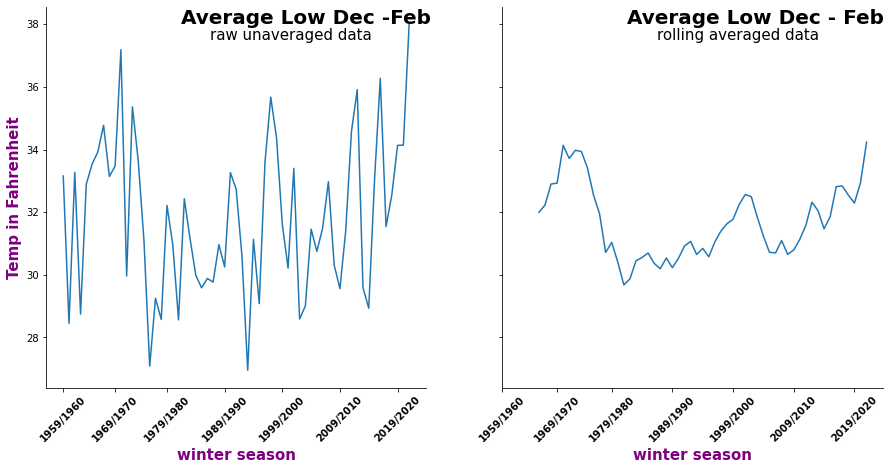

In [279]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(meeny.index, meeny)
ax[1].plot(meeny.index, meeny.rolling(7).mean())

ax[0].set_xticks(['1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[0].set_xticklabels(['1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[0].set_yticks([28, 30, 32, 34, 36])
#ax[0].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[0].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('Temp in Fahrenheit', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)



ax[1].set_xticks(['1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[1].set_xticklabels(['1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[1].set_yticks([28, 30, 32, 34, 36])
#ax[1].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[1].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[0].text(x=20.5, y=38, s='Average Low Dec -Feb',
        size=20, weight='bold')
ax[0].text(x=25.5, y=37.5, s='raw unaveraged data',
        size=15)
ax[1].text(x=20.5, y=38, s='Average Low Dec - Feb',
        size=20, weight='bold')
ax[1].text(x=25.5, y=37.5, s='rolling averaged data',
        size=15)
plt.show()

## Aside from the epic winters of the late 1970's, it seems that the average nightly winter low has steadily increased since the 1970s. This is best shown in the lower graph which is a rolling average of 7 years past.   Moreover,  in the last few years of 2017 to 2021, low temps have increased dramatically as compared to the 1.5 Fahrenheit increase in global temperatures.

## Now, I will focus on the number of nightly lows each season that dropped below a certain threshold. I played around and it seamed that a threshold of 20F gave significant data

In [280]:
zippo = df3.groupby('season')['MIN'].apply(lambda x: x[x < 20.0].count())
print(zippo.index)

Index(['1959/1960', '1960/1961', '1961/1962', '1962/1963', '1963/1964',
       '1964/1965', '1965/1966', '1966/1967', '1967/1968', '1968/1969',
       '1969/1970', '1972/1973', '1973/1974', '1974/1975', '1975/1976',
       '1976/1977', '1977/1978', '1978/1979', '1979/1980', '1980/1981',
       '1981/1982', '1982/1983', '1983/1984', '1984/1985', '1985/1986',
       '1986/1987', '1987/1988', '1988/1989', '1989/1990', '1990/1991',
       '1991/1992', '1992/1993', '1993/1994', '1994/1995', '1995/1996',
       '1996/1997', '1997/1998', '1998/1999', '1999/2000', '2000/2001',
       '2001/2002', '2002/2003', '2003/2004', '2004/2005', '2005/2006',
       '2006/2007', '2007/2008', '2008/2009', '2009/2010', '2010/2011',
       '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016',
       '2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021',
       '2021/2022'],
      dtype='object', name='season')


In [281]:
print(zippo)

season
1959/1960     0
1960/1961    26
1961/1962     7
1962/1963    26
1963/1964    10
             ..
2017/2018    19
2018/2019     8
2019/2020     0
2020/2021     0
2021/2022     0
Name: MIN, Length: 61, dtype: int64


In [282]:
ziproll = zippo.rolling(10).mean()
print(ziproll)

season
1959/1960     NaN
1960/1961     NaN
1961/1962     NaN
1962/1963     NaN
1963/1964     NaN
             ... 
2017/2018    13.0
2018/2019    12.4
2019/2020    10.6
2020/2021    10.0
2021/2022     9.8
Name: MIN, Length: 61, dtype: float64


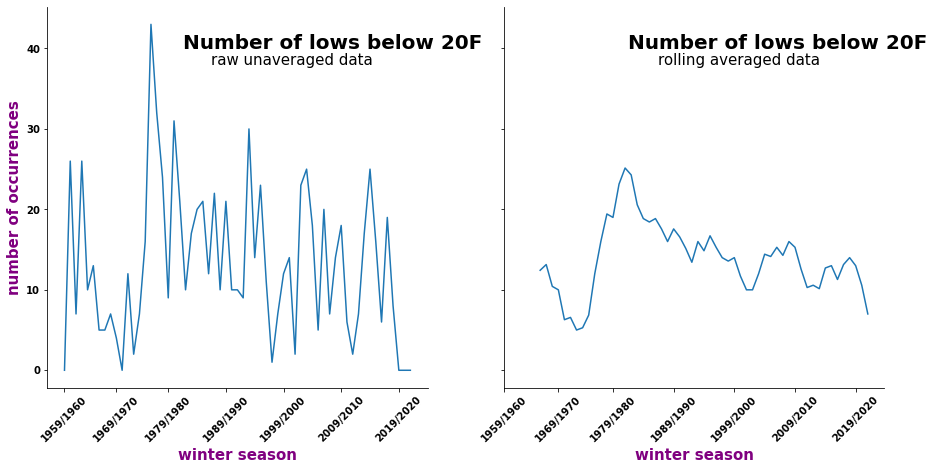

In [283]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(zippo.index, zippo)
ax[1].plot(zippo.index, zippo.rolling(7).mean())

ax[0].set_xticks(['1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[0].set_xticklabels(['1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
ax[0].set_yticks([0, 10, 20, 30, 40])
ax[0].set_yticklabels([0, 10, 20, 30, 40], weight = 'bold')
ax[0].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)



ax[1].set_xticks(['1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[1].set_xticklabels(['1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
ax[1].set_yticks([0, 10, 20, 30, 40])
ax[1].set_yticklabels([0, 10, 20, 30, 40], weight = 'bold')
ax[1].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[0].text(x=20.5, y=40, s='Number of lows below 20F',
        size=20, weight='bold')
ax[0].text(x=25.5, y=38, s='raw unaveraged data',
        size=15)
ax[1].text(x=20.5, y=40, s='Number of lows below 20F',
        size=20, weight='bold')
ax[1].text(x=25.5, y=38, s='rolling averaged data',
        size=15)
plt.show()




### data and graphs above show a dramatic drop in occurrences of nightly lows falling below the threshold of 20F at DCA airport. Note that the last several winter seasons had no nights falling below 20F, something not seen previously in the airport's 60 years of weather observations
### a rolling feature is applied to the right linegraph to average each datapoint according to the previous 7 data points to get a more smooth plot. Notice the huge percentage drop in nightly lows falling below this 20F threshold! I find it hard to believe that this can be statistically explained by just a 1.5 Fahrenheit degrees increase in global temperatures.


In [284]:
df2gb = df2.groupby(['year', 'month'])['MIN'].mean()
print(df2gb)

year  month
1960  1        33.496774
      2        32.789655
      3        29.938710
      4        51.596667
      5        56.632258
                 ...    
2021  8        71.758065
      9        63.696667
      10       57.754839
      11       37.823333
      12       36.893548
Name: MIN, Length: 705, dtype: float64


In [285]:
print(type(df2gb))

<class 'pandas.core.series.Series'>


## now I will calculate the average nightly lows for each year for the coldest month of the year (January) and the warmest month of the year (July) to see how they compare

In [286]:
jandat = df2[df2['month'] == 1]
#print(janmin)
dfjanminmean = jandat.groupby(['year'])['MIN'].mean()
print (dfjanminmean)

year
1960    33.496774
1961    24.948387
1962    29.638710
1963    26.409677
1964    31.809677
1965    28.496774
1966    29.260000
1967    34.833333
1968    25.877273
1969    29.919048
1973    30.370968
1974    34.416129
1975    30.735484
1976    24.303226
1977    16.322581
1978    23.445161
1979    26.464516
1980    29.948387
1981    24.377419
1982    18.000000
1983    29.429032
1984    23.141935
1985    22.203226
1986    26.132258
1987    26.361290
1988    21.545161
1989    29.890323
1990    33.151613
1991    28.632258
1992    28.345161
1993    31.051613
1994    18.916129
1995    31.087097
1996    23.880645
1997    29.829032
1998    35.661290
1999    30.500000
2000    26.990323
2001    26.167742
2002    31.729032
2003    23.903226
2004    21.980645
2005    27.545161
2006    33.354839
2007    31.583871
2008    31.061290
2009    23.503226
2010    26.974194
2011    26.458065
2012    30.912903
2013    31.119355
2014    21.919355
2015    27.035484
2016    25.348387
2017    34.003226
2018 

In [287]:
juldat = df2[df2['month'] == 7]
#print(janmin)
dfjulminmean = juldat.groupby(['year'])['MIN'].mean()
print (dfjulminmean)

year
1960    69.290323
1961    71.496774
1962    67.667742
1963    70.048387
1964    71.067742
1965    69.809677
1966    73.810000
1967    71.020000
1968    73.145455
1969    74.080952
1973    68.190323
1974    67.100000
1975    69.777419
1976    67.703226
1977    69.848387
1978    69.125806
1979    70.000000
1980    72.267742
1981    71.474194
1982    70.451613
1983    70.138710
1984    68.141935
1985    68.319355
1986    70.974194
1987    71.938710
1988    70.006452
1989    69.203226
1990    69.664516
1991    71.322581
1992    70.077419
1993    72.587097
1994    72.051613
1995    71.512903
1996    69.125806
1997    69.709677
1998    68.538710
1999    73.322581
2000    65.951613
2001    65.229032
2002    71.067742
2003    68.925806
2004    70.000000
2005    71.541935
2006    70.719355
2007    68.496774
2008    71.087097
2009    66.870968
2010    72.706452
2011    74.077419
2012    74.280645
2013    73.393548
2014    69.667742
2015    72.535484
2016    73.422581
2017    72.364516
2018 

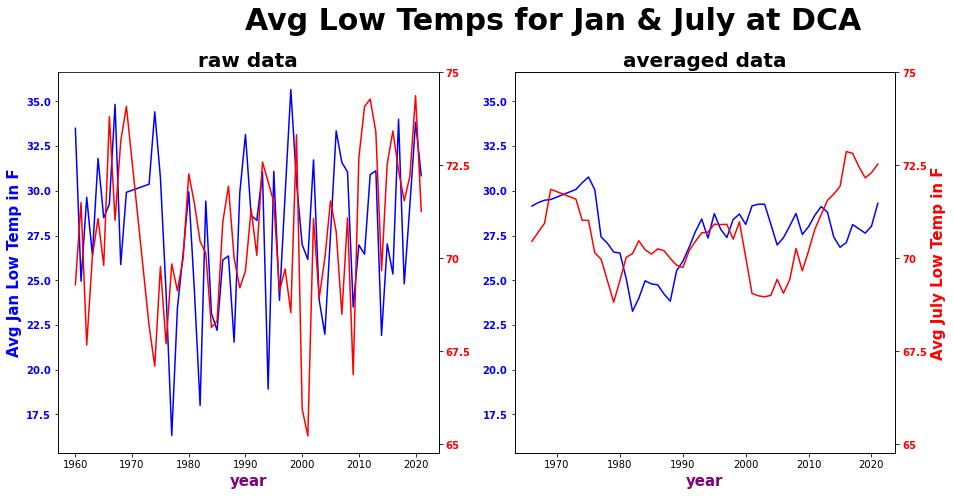

In [288]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].plot(dfjanminmean.index, dfjanminmean, color='blue')

# Create a twin Axes that shares the x-axis
ax2 = np.array([a.twinx() for a in ax.ravel()]).reshape(ax.shape)


# Plot the relative temperature in red
ax2[0].plot(dfjulminmean.index, dfjulminmean,color='red')
# Plot the CO2 variable in blue
ax[1].plot(dfjanminmean.index, dfjanminmean.rolling(7).mean(), color='blue')

ax[0].set_yticks([17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0])
ax[0].set_yticklabels([17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0], weight = 'bold', c = 'blue')
ax2[0].set_yticks([65, 67.5, 70, 72.5, 75])
ax2[0].set_yticklabels([65, 67.5, 70, 72.5, 75], weight = 'bold', c = 'red')
ax[0].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('Avg Jan Low Temp in F', c = 'blue', size = 15, weight = 'bold')
ax2[1].set_ylabel ('Avg July Low Temp in F', c = 'red', size = 15, weight = 'bold')

ax2[1].plot(dfjulminmean.index, dfjulminmean.rolling(7).mean(),color='red')
ax2[0].get_shared_y_axes().join(ax2[0], ax2[1])
ax[0].get_shared_y_axes().join(ax[0], ax[1])


ax[1].set_yticks([17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0])
ax[1].set_yticklabels([17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0], weight = 'bold', c = 'blue')
ax2[1].set_yticks([65, 67.5, 70, 72.5, 75])
ax2[1].set_yticklabels([65, 67.5, 70, 72.5, 75], weight = 'bold', c = 'red')
ax[1].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')

ax[0].spines['top'].set_visible(False)

ax[0].set_title("raw data", size=20, weight='bold')
ax[1].set_title("averaged data", size=20, weight='bold')

ax[0].text(x=1990, y=39, s='Avg Low Temps for Jan & July at DCA', size=30, weight='bold')


plt.show()

## Average July nightly lows (in yellow) appear to have increased in recent years but the data for January nightly lows seems to be inconclusive.  What I thought would be a significant indication of global warming (i.e. occurrences of extreme cold nights) did not show an outsized indicator of global warming.  Instead, looking at the progression of nightly lows overall and not just focussing on extremely cold nights best exemplifies the effect of global warming in Washington DC.

